#  Data Science Competition :  Predicting Probability of Default

### Problem Statement

Financial institutions face significant risks due to loan defaults. Accurately predicting the 
probability of default (PD) on loans is critical for risk management and strategic planning. In this 
competition, participants are tasked with developing a predictive model that estimates the 
probability of default on loans using historical loan data.

### Import Python libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pandas as pd
import plotly.express as px


from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.preprocessing import label_binarize 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from datetime import datetime, date

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
#Import SVM and KNN

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, accuracy_score, roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from IPython.display import display
from sklearn.decomposition import PCA
from sklearn.calibration import calibration_curve, CalibratedClassifierCV

pd.options.display.max_columns=None

### Importing the required dataset

In [2]:
data = pd.read_csv('C:/Users/ntumbare/Desktop/Data_Science/data_science_competition_2024.csv') 
data = pd.DataFrame(data)

### View the first lines of the dataset

In [3]:
data.head()

,Unnamed: 0,loan_id,gender,disbursemet_date,currency,country,sex,is_employed,job,location,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,number_of_defaults.1,remaining term,salary,marital_status,age.1,Loan Status
0,0,8d05de78-ff32-46b1-aeb5-b3190f9c158a,female,2022 10 29,USD,Zimbabwe,female,True,Teacher,Beitbridge,39000,0,48653.01147,0.22,37,0,47,3230.038869,married,37,Did not default
1,1,368bf756-fcf2-4822-9612-f445d90b485b,other,2020 06 06,USD,Zimbabwe,other,True,Teacher,Harare,27000,2,28752.06224,0.20,43,2,62,3194.139103,single,43,Did not default
2,2,6e3be39e-49b5-45b5-aab6-c6556de53c6f,other,2023 09 29,USD,Zimbabwe,other,True,Nurse,Gweru,35000,1,44797.55413,0.22,43,1,57,3330.826656,married,43,Did not default
3,3,191c62f8-2211-49fe-ba91-43556b307871,female,2022 06 22,USD,Zimbabwe,female,True,Doctor,Rusape,24000,0,35681.49641,0.23,47,0,42,2246.797020,divorced,47,Did not default
4,4,477cd8a1-3b01-4623-9318-8cd6122a8346,male,2023 02 08,USD,Zimbabwe,male,True,Nurse,Chipinge,19000,0,34156.05588,0.20,42,0,45,2310.858441,married,42,Did not default


### View a list of all the variables in the data
The list printed helps in identifying repeated variables e.g number_of_defaults, age <br />
Before looking at the descriptive statistics of this data, we need to clean it first i.e droping repeated variables and dropping unneccesary variables such as loan_IDs. <br />

- Irrelevant to the Task: <br />
Unique identifiers, like a row number or customer ID, usually do not contain any useful information for the machine learning task at hand. These columns do not provide any predictive power, and including them can actually hurt the model's performance by introducing unnecessary noise.

In [4]:
columns = data.columns

print('List of Variables in Dataset:')
print('-----------------------------')
for column in columns:
    print(f'- {column}')



List of Variables in Dataset:
-----------------------------
- Unnamed: 0
- loan_id
- gender
- disbursemet_date
- currency
- country
- sex
- is_employed
- job
- location
- loan_amount
- number_of_defaults
- outstanding_balance
- interest_rate
- age
- number_of_defaults.1
- remaining term
- salary
- marital_status
- age.1
- Loan Status


### Shows count of rows and columns of the data

In [5]:
data.shape

(100000, 21)

### Looking at the data type of the variables in the data
This helps to identify missing data within the variables given that the shape of this data is 100,000 yet some variables have less than that number i.e. country, job, location.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            100000 non-null  int64  
 1   loan_id               100000 non-null  object 
 2   gender                100000 non-null  object 
 3   disbursemet_date      100000 non-null  object 
 4   currency              100000 non-null  object 
 5   country               99900 non-null   object 
 6   sex                   100000 non-null  object 
 7   is_employed           100000 non-null  bool   
 8   job                   95864 non-null   object 
 9   location              99405 non-null   object 
 10  loan_amount           100000 non-null  int64  
 11  number_of_defaults    100000 non-null  int64  
 12  outstanding_balance   100000 non-null  float64
 13  interest_rate         100000 non-null  float64
 14  age                   100000 non-null  int64  
 15  n

### a. Data Cleaning
Data cleaning is easier when we are exploring variable  by variable so that none will be skipped in the process <br />
The first step is exploring its response variable under the follwing inconsistences:
- Repeated variables  <br />
- Missing values  <br />
- leading/trailing spaces <br />
- Inconsistent labells   <br />
- dropping unnecessary variables such as unique identifiers

### 1. Unnamed: 0
This varaiable is a counting variable and is unnamed/unlabelled, hence need to be dropped as it is of no significant use.<br />
Drop the first unlabeled column


In [7]:
data = data.drop(data.columns[0], axis=1)

### View the data information after dropping the first variable

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_id               100000 non-null  object 
 1   gender                100000 non-null  object 
 2   disbursemet_date      100000 non-null  object 
 3   currency              100000 non-null  object 
 4   country               99900 non-null   object 
 5   sex                   100000 non-null  object 
 6   is_employed           100000 non-null  bool   
 7   job                   95864 non-null   object 
 8   location              99405 non-null   object 
 9   loan_amount           100000 non-null  int64  
 10  number_of_defaults    100000 non-null  int64  
 11  outstanding_balance   100000 non-null  float64
 12  interest_rate         100000 non-null  float64
 13  age                   100000 non-null  int64  
 14  number_of_defaults.1  100000 non-null  int64  
 15  r

### 2.   loan_id 
The loan_id is excluded when determmining the trainig and test set data as well as in reporting descriptive statistics as it is of no significant value in predicting default.

### 3. gender  

This variable has no inconsistences or missing values detected with 3 response categories i.e. female, other, male

In [9]:
print(data['gender'].unique())

['female' 'other' 'male']


### 4. disbursemet_date
This variable was checked for any inconsistences. 
Rather was determined not so useful on its own since the machine will never see these historical years in the future so it is not useful to train the model on historical dates it will not see in future rather was used to create new variables. <br />

The new variable that was created was 'loan_length'. <br />
 
This variable trade-off speaks to the duration or time period in months at which the loan existed in the loan portfolio books i.e the time in months elapsed between the date the loan was disbursed and the date when the PDs were predicted, calculated as:   <br />

   loan_length = PD_prediction_date - disbursement_date  <br />
   
The unit of choice as months was used because months provide a more precise measure of the loan length, especially for shorter loans. In this case the loans are all below 5 years since disbursement and some loans were disbursed in 2023, less than a year in the credit portfolio. <br />

The 'PD_prediction_date' was note stated or given, hence an assumption was made for the creation of this additional variable. <br />

Assumption: <br />

- Assume that the PDs were predicted as at 30 June 2024  <br />
Hence the formular for 'loan_length' would be:    <br />
           loan_length = 30 June 2024 - disbursement_date  <br />

The disbursement date was dropped.


In [10]:

# Convert the 'disbursemet_date' to datetime
data['disbursemet_date'] = pd.to_datetime(data['disbursemet_date'], format='%Y %m %d')

# Calculate the 'loan_length' in months
current_date = date(2024, 6, 30)
data['loan_length'] = [(current_date.year * 12 + current_date.month) - (d.year * 12 + d.month) for d in data['disbursemet_date']]

# Create the new DataFrame
data = pd.DataFrame(data)

print(data)

                                    loan_id  gender disbursemet_date currency  \
0      8d05de78-ff32-46b1-aeb5-b3190f9c158a  female       2022-10-29      USD   
1      368bf756-fcf2-4822-9612-f445d90b485b   other       2020-06-06      USD   
2      6e3be39e-49b5-45b5-aab6-c6556de53c6f   other       2023-09-29      USD   
3      191c62f8-2211-49fe-ba91-43556b307871  female       2022-06-22      USD   
4      477cd8a1-3b01-4623-9318-8cd6122a8346    male       2023-02-08      USD   
...                                     ...     ...              ...      ...   
99995  41000f4b-3821-4dea-90e1-9ecf591ed1c0    male       2021-10-20      USD   
99996  507c2a45-02fa-4aa0-854a-8947a865a7ea   other       2023-06-11      USD   
99997  4f10e845-8f75-4cd5-9f3a-3dad3e04a483  female       2021-10-20      USD   
99998  eded01ca-79d2-4e86-a1e3-2ea1354edca7    male       2021-08-22      USD   
99999  a37561ec-0901-4350-8a13-634f80ece55d   other       2022-04-29      USD   

        country     sex  is

In [11]:
data = data.drop('disbursemet_date', axis=1)

In [12]:
print(data)

                                    loan_id  gender currency   country  \
0      8d05de78-ff32-46b1-aeb5-b3190f9c158a  female      USD  Zimbabwe   
1      368bf756-fcf2-4822-9612-f445d90b485b   other      USD  Zimbabwe   
2      6e3be39e-49b5-45b5-aab6-c6556de53c6f   other      USD  Zimbabwe   
3      191c62f8-2211-49fe-ba91-43556b307871  female      USD  Zimbabwe   
4      477cd8a1-3b01-4623-9318-8cd6122a8346    male      USD  Zimbabwe   
...                                     ...     ...      ...       ...   
99995  41000f4b-3821-4dea-90e1-9ecf591ed1c0    male      USD  Zimbabwe   
99996  507c2a45-02fa-4aa0-854a-8947a865a7ea   other      USD  Zimbabwe   
99997  4f10e845-8f75-4cd5-9f3a-3dad3e04a483  female      USD  Zimbabwe   
99998  eded01ca-79d2-4e86-a1e3-2ea1354edca7    male      USD  Zimbabwe   
99999  a37561ec-0901-4350-8a13-634f80ece55d   other      USD  Zimbabwe   

          sex  is_employed           job     location  loan_amount  \
0      female         True       Teacher 

### 5. currency
The currency variable is deemed not important and is not providing any additional information to the analysis, as it is a constant. <br />
However, if I you had more variation in the 'currency' column e.g., 'USD', 'EUR', 'GBP', then it could be an important predictor to include in modelling. <br />
Hence the currency variable is dropped.

In [13]:
data = data.drop('currency', axis=1)
print(data)

                                    loan_id  gender   country     sex  \
0      8d05de78-ff32-46b1-aeb5-b3190f9c158a  female  Zimbabwe  female   
1      368bf756-fcf2-4822-9612-f445d90b485b   other  Zimbabwe   other   
2      6e3be39e-49b5-45b5-aab6-c6556de53c6f   other  Zimbabwe   other   
3      191c62f8-2211-49fe-ba91-43556b307871  female  Zimbabwe  female   
4      477cd8a1-3b01-4623-9318-8cd6122a8346    male  Zimbabwe    male   
...                                     ...     ...       ...     ...   
99995  41000f4b-3821-4dea-90e1-9ecf591ed1c0    male  Zimbabwe    male   
99996  507c2a45-02fa-4aa0-854a-8947a865a7ea   other  Zimbabwe   other   
99997  4f10e845-8f75-4cd5-9f3a-3dad3e04a483  female  Zimbabwe  female   
99998  eded01ca-79d2-4e86-a1e3-2ea1354edca7    male  Zimbabwe    male   
99999  a37561ec-0901-4350-8a13-634f80ece55d   other  Zimbabwe   other   

       is_employed           job     location  loan_amount  \
0             True       Teacher   Beitbridge        39000   

### 6. country
The country variable is deemed not important and is not providing any additional information to the analysis, and is a constant. <br />
If I you had more country variation in the country column e.g. Zambia, South Africa, then it could be an important predictor to include in modelling.<br />
Hence the country variable is dropped.

In [14]:
#View this country variable

print(pd.unique(data['country']))

['Zimbabwe' 'zimbabwe' 'Zim' nan]


In [15]:
data = data.drop('country', axis=1)
print(data)

                                    loan_id  gender     sex  is_employed  \
0      8d05de78-ff32-46b1-aeb5-b3190f9c158a  female  female         True   
1      368bf756-fcf2-4822-9612-f445d90b485b   other   other         True   
2      6e3be39e-49b5-45b5-aab6-c6556de53c6f   other   other         True   
3      191c62f8-2211-49fe-ba91-43556b307871  female  female         True   
4      477cd8a1-3b01-4623-9318-8cd6122a8346    male    male         True   
...                                     ...     ...     ...          ...   
99995  41000f4b-3821-4dea-90e1-9ecf591ed1c0    male    male        False   
99996  507c2a45-02fa-4aa0-854a-8947a865a7ea   other   other         True   
99997  4f10e845-8f75-4cd5-9f3a-3dad3e04a483  female  female         True   
99998  eded01ca-79d2-4e86-a1e3-2ea1354edca7    male    male         True   
99999  a37561ec-0901-4350-8a13-634f80ece55d   other   other         True   

                job     location  loan_amount  number_of_defaults  \
0           Teache

### 7. sex
The sex variable was repeated from the gender variable, hence it was instantly dropped.

In [16]:
data = data.drop('sex', axis=1)
print(data)

                                    loan_id  gender  is_employed  \
0      8d05de78-ff32-46b1-aeb5-b3190f9c158a  female         True   
1      368bf756-fcf2-4822-9612-f445d90b485b   other         True   
2      6e3be39e-49b5-45b5-aab6-c6556de53c6f   other         True   
3      191c62f8-2211-49fe-ba91-43556b307871  female         True   
4      477cd8a1-3b01-4623-9318-8cd6122a8346    male         True   
...                                     ...     ...          ...   
99995  41000f4b-3821-4dea-90e1-9ecf591ed1c0    male        False   
99996  507c2a45-02fa-4aa0-854a-8947a865a7ea   other         True   
99997  4f10e845-8f75-4cd5-9f3a-3dad3e04a483  female         True   
99998  eded01ca-79d2-4e86-a1e3-2ea1354edca7    male         True   
99999  a37561ec-0901-4350-8a13-634f80ece55d   other         True   

                job     location  loan_amount  number_of_defaults  \
0           Teacher   Beitbridge        39000                   0   
1           Teacher       Harare        27000

### 8. is_employed
This variable was checked for inconsistences and none were found including missind data, errors in labels etc

In [17]:
print(data['is_employed'].unique())

[ True False]


### 9. job
This variable consisted of more than 4,000 entries with missing data. <br />
Besides missing data the response labels were not inconsistent e.g 'Software Developer' vs 'SoftwareDeveloper' and  'Data Scintist' vs 'Data Scientist' <br />
These missing values were filled using the 'is_emplyed' variable. <br />
It was found that all the missing values on 'job' were not employed under the 'is_employed' variable i.e they were all 'FALSE' <br />
The 'is_emplyed' variable determined the replacements on the 'job' variable as follows: <br />
- if 'is_employed' is 'FALSE' the 'job' 'Unemployed'

In [18]:
print(data['job'].unique())

['Teacher' 'Nurse' 'Doctor' 'Data Analyst' 'Software Developer'
 'Accountant' 'Lawyer' 'Engineer' nan 'Data Scientist' 'SoftwareDeveloper'
 'Data Scintist']


In [19]:
# Standardize job titles
data['job'] = data['job'].str.title()
data['job'] = data['job'].replace('Softwaredeveloper', 'Software Developer')
data['job'] = data['job'].replace('Data Scintist', 'Data Scientist')

# Handle missing values
data['job'] = data['job'].fillna('Unemployed')

# Create a list of unique job titles
unique_jobs = data['job'].unique()
print(unique_jobs)

['Teacher' 'Nurse' 'Doctor' 'Data Analyst' 'Software Developer'
 'Accountant' 'Lawyer' 'Engineer' 'Unemployed' 'Data Scientist']


### 10. location
This variable was checked for inconsistences and some were found. <br />
The variable had inconsistent response labelling, were the responses had leading spaces hence the names were repeated e.g 'Gweru', ' Gweru   ', ' Gweru '. <br />

In [20]:
print(data['location'].unique())

['Beitbridge' 'Harare' 'Gweru' 'Rusape' 'Chipinge' 'Chimanimani'
 'Marondera' 'Kadoma' 'Mutare' 'Masvingo' 'Bulawayo' 'Kariba' 'Plumtree'
 'Chiredzi' 'Shurugwi' 'Chivhu' 'Zvishavane' 'Nyanga' 'Karoi' 'Redcliff'
 'Kwekwe' ' Karoi ' 'Gokwe' 'Victoria Falls' ' Masvingo ' '   Chipinge   '
 ' Mutare ' nan '   Mutare ' ' Marondera   ' '   Rusape   ' ' Bulawayo   '
 'Chivhu ' ' Chimanimani   ' 'Plumtree   ' '   Masvingo   ' '   Gweru '
 '   Chivhu   ' 'Mutare   ' ' Kwekwe ' 'Marondera   ' ' Chipinge   '
 '   Mutare   ' '   Karoi   ' ' Beitbridge   ' '   Karoi ' ' Beitbridge '
 ' Mutare   ' '   Bulawayo ' 'Masvingo   ' ' Kadoma   ' ' Plumtree '
 'Marondera ' '   Plumtree ' ' Chipinge ' '   Harare ' 'Harare   '
 ' Nyanga   ' ' Gweru   ' 'Rusape   ' 'Masvingo ' '   Harare   '
 ' Kadoma ' 'Bulawayo   ' ' Kwekwe   ' 'Hwange' ' Harare '
 '   Marondera   ' 'Chipinge   ' '   Marondera ' '   Beitbridge '
 'Karoi   ' 'Chimanimani ' ' Bulawayo ' 'Chivhu   ' 'Kwekwe ' ' Kariba   '
 ' Marondera ' 'Plumtre

### Removing leading/trailing spaces on the response variables
These leading spaces affect the uniquness of responses in my 'location' variable 

In [21]:
data['location'] = data['location'].str.strip()

### View the unique locations
The location variable also has blanks labelled 'nan'

In [22]:
print(pd.unique(data['location']))

['Beitbridge' 'Harare' 'Gweru' 'Rusape' 'Chipinge' 'Chimanimani'
 'Marondera' 'Kadoma' 'Mutare' 'Masvingo' 'Bulawayo' 'Kariba' 'Plumtree'
 'Chiredzi' 'Shurugwi' 'Chivhu' 'Zvishavane' 'Nyanga' 'Karoi' 'Redcliff'
 'Kwekwe' 'Gokwe' 'Victoria Falls' nan 'Hwange']


### Missing data in the 'location' variable
Fill missing values with 'Not_specified' in the location variable for completeness. <br />
The variable is quite important since it reflects the level of default as per clients respective location/city of residence <br />
The economic conditions and performance of a specific region or city can have a significant impact on the financial health and creditworthiness of individuals and businesses located there. Factors like employment rates, income levels, industry composition, and economic growth can vary across different locations and influence the default risk. <br />
Cost of Living: <br />
The cost of living in a particular city or region can affect the financial stability of individuals and businesses. <br />
Higher costs of living, such as housing, utilities, and other expenses, can put more strain on their financial resources and increase the likelihood of default.<br />

In [23]:
data['location'] = data['location'].fillna('Not_specified')

# Display the updated DataFrame
print(data)

                                    loan_id  gender  is_employed  \
0      8d05de78-ff32-46b1-aeb5-b3190f9c158a  female         True   
1      368bf756-fcf2-4822-9612-f445d90b485b   other         True   
2      6e3be39e-49b5-45b5-aab6-c6556de53c6f   other         True   
3      191c62f8-2211-49fe-ba91-43556b307871  female         True   
4      477cd8a1-3b01-4623-9318-8cd6122a8346    male         True   
...                                     ...     ...          ...   
99995  41000f4b-3821-4dea-90e1-9ecf591ed1c0    male        False   
99996  507c2a45-02fa-4aa0-854a-8947a865a7ea   other         True   
99997  4f10e845-8f75-4cd5-9f3a-3dad3e04a483  female         True   
99998  eded01ca-79d2-4e86-a1e3-2ea1354edca7    male         True   
99999  a37561ec-0901-4350-8a13-634f80ece55d   other         True   

                job     location  loan_amount  number_of_defaults  \
0           Teacher   Beitbridge        39000                   0   
1           Teacher       Harare        27000

# Assigning provinces to the 'location' variable
The location cvariable was assigned city provinces to reduce dimensionality, improve generalization and robustness to sparse data in the variable. <br />
Aggregating the locations to the province level can significantly reduce the number of unique categories, making the data more manageable for the model. <br />
The province-level information may capture broader regional factors that influence default risk, such as economic conditions, infrastructure <br />
Some cities may have very few observations in the dataset, making it challenging for the model to learn reliable patterns.<br />
Grouping the data by province can help address this issue by ensuring that each province has a sufficient number of observations for the model to learn from.

In [24]:
#Define the mapping of locations to provinces
location_to_province = {
    'Beitbridge': 'Matabeleland South',
    'Harare': 'Harare',
    'Gweru': 'Midlands',
    'Rusape': 'Manicaland',
    'Chipinge': 'Manicaland',
    'Chimanimani': 'Manicaland',
    'Marondera': 'Mashonaland East',
    'Kadoma': 'Mashonaland West',
    'Mutare': 'Manicaland',
    'Masvingo': 'Masvingo',
    'Bulawayo': 'Bulawayo',
    'Kariba': 'Mashonaland West',
    'Plumtree': 'Matabeleland South',
    'Chiredzi': 'Masvingo',
    'Shurugwi': 'Midlands',
    'Chivhu': 'Mashonaland East',
    'Zvishavane': 'Midlands',
    'Nyanga': 'Manicaland',
    'Karoi': 'Mashonaland West',
    'Redcliff': 'Midlands',
    'Kwekwe': 'Midlands',
    'Gokwe': 'Midlands',
    'Victoria Falls': 'Matabeleland North',
    'Hwange': 'Matabeleland North'
}

# Replace the location values with the corresponding provinces
data['province'] = data['location'].map(location_to_province).fillna('Not_Specified')

# Display the updated DataFrame
print(data)

                                    loan_id  gender  is_employed  \
0      8d05de78-ff32-46b1-aeb5-b3190f9c158a  female         True   
1      368bf756-fcf2-4822-9612-f445d90b485b   other         True   
2      6e3be39e-49b5-45b5-aab6-c6556de53c6f   other         True   
3      191c62f8-2211-49fe-ba91-43556b307871  female         True   
4      477cd8a1-3b01-4623-9318-8cd6122a8346    male         True   
...                                     ...     ...          ...   
99995  41000f4b-3821-4dea-90e1-9ecf591ed1c0    male        False   
99996  507c2a45-02fa-4aa0-854a-8947a865a7ea   other         True   
99997  4f10e845-8f75-4cd5-9f3a-3dad3e04a483  female         True   
99998  eded01ca-79d2-4e86-a1e3-2ea1354edca7    male         True   
99999  a37561ec-0901-4350-8a13-634f80ece55d   other         True   

                job     location  loan_amount  number_of_defaults  \
0           Teacher   Beitbridge        39000                   0   
1           Teacher       Harare        27000

In [25]:
print(pd.unique(data['province']))

['Matabeleland South' 'Harare' 'Midlands' 'Manicaland' 'Mashonaland East'
 'Mashonaland West' 'Masvingo' 'Bulawayo' 'Matabeleland North'
 'Not_Specified']


### Drop the 'location' variable
Since we have used the location variable to create a new variable 'province' and hence the variable is dropped. <br />

In [26]:
data = data.drop('location', axis=1)

In [27]:
# Display the updated DataFrame
print(data)

                                    loan_id  gender  is_employed  \
0      8d05de78-ff32-46b1-aeb5-b3190f9c158a  female         True   
1      368bf756-fcf2-4822-9612-f445d90b485b   other         True   
2      6e3be39e-49b5-45b5-aab6-c6556de53c6f   other         True   
3      191c62f8-2211-49fe-ba91-43556b307871  female         True   
4      477cd8a1-3b01-4623-9318-8cd6122a8346    male         True   
...                                     ...     ...          ...   
99995  41000f4b-3821-4dea-90e1-9ecf591ed1c0    male        False   
99996  507c2a45-02fa-4aa0-854a-8947a865a7ea   other         True   
99997  4f10e845-8f75-4cd5-9f3a-3dad3e04a483  female         True   
99998  eded01ca-79d2-4e86-a1e3-2ea1354edca7    male         True   
99999  a37561ec-0901-4350-8a13-634f80ece55d   other         True   

                job  loan_amount  number_of_defaults  outstanding_balance  \
0           Teacher        39000                   0          48653.01147   
1           Teacher        27

### 11. loan_amount

-Loan amount is an integer data type, representing the initial loan amount at disbursement <br />
-It has no missing values and is not a repeated variable.


In [28]:
print(pd.unique(data['loan_amount']))

[ 39000  27000  35000  24000  19000  29000  38000  23000  50000  43000
  31000  40000  21000   4000  44000  42000   5000  57000  33000  37000
  13000  49000  46000  36000  22000  11000  20000  51000  18000  53000
  54000  28000  26000  34000  32000  16000  30000  55000  45000  17000
  56000  10000  25000  14000  48000  62000   6000  47000  52000  64000
  60000   2000   8000  41000  12000   3000   9000   7000  15000  61000
  65000  58000 135000  63000  75000   1000  59000  70000 187500 222000
  66000  69000 117000 114000  72000  76000  67000 219000  68000 185000
 180000 240000 152000  74000  78000 216000 212500 154000  71000 112500
 250000 243000 150000 195000  81000 144000 106500 213000  79000 225000
 228000 156000 120000 234000 182500  73000 146000 108000 178000 142000
 192500 190000 237000 111000 177500 132000 109500 210000 158000 121500
 246000 168000 182000  88000 166000 255000 148000 197500 164000  77000
 252000 118500 258000 115500 273000  80000 202500  83000 205000  82000
 23100

### 12. number_of_defaults
-This variable is of the integer data type, representing the number of type a lender has defaulted in the period of 2020 - 2023 <br />
-One inconsistence that was found on this variable is its repeatation hence the repeated variable was dropped

In [29]:
print(pd.unique(data['number_of_defaults']))

[0 2 1]


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_id               100000 non-null  object 
 1   gender                100000 non-null  object 
 2   is_employed           100000 non-null  bool   
 3   job                   100000 non-null  object 
 4   loan_amount           100000 non-null  int64  
 5   number_of_defaults    100000 non-null  int64  
 6   outstanding_balance   100000 non-null  float64
 7   interest_rate         100000 non-null  float64
 8   age                   100000 non-null  int64  
 9   number_of_defaults.1  100000 non-null  int64  
 10  remaining term        100000 non-null  object 
 11  salary                100000 non-null  float64
 12  marital_status        100000 non-null  object 
 13  age.1                 100000 non-null  int64  
 14  Loan Status           100000 non-null  object 
 15  l

In [31]:
data = data.drop('number_of_defaults.1', axis=1)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_id              100000 non-null  object 
 1   gender               100000 non-null  object 
 2   is_employed          100000 non-null  bool   
 3   job                  100000 non-null  object 
 4   loan_amount          100000 non-null  int64  
 5   number_of_defaults   100000 non-null  int64  
 6   outstanding_balance  100000 non-null  float64
 7   interest_rate        100000 non-null  float64
 8   age                  100000 non-null  int64  
 9   remaining term       100000 non-null  object 
 10  salary               100000 non-null  float64
 11  marital_status       100000 non-null  object 
 12  age.1                100000 non-null  int64  
 13  Loan Status          100000 non-null  object 
 14  loan_length          100000 non-null  int64  
 15  province          

### 13. Float variables

#### oustanding balance, interest_rates, salary
-These variables were defined as float data types hence they were cleaned together.

### Missing values 
-In this case none were found to have missing values. <br />
-This approach calculates the mean of the non-missing values in the float variable. <br />
-Replace the missing values with the calculated mean or median. <br />
-This approach assumes that the missing values are missing at random and can be reasonably approximated by the central tendency of the observed data. <br />
-Replacing missing values with the mean or median helps preserve the overall distribution of the variable, as the imputed values are based on the observed data. <br />
-This can be important for maintaining the statistical properties of the variable, such as its central tendencyand spread, which may be important for certain types of analysis or modeling.<br />

In [33]:
#List the float variables with missing data

float_variables = ['outstanding_balance', 'interest_rate', 'salary']

# Performing the mean imputation for each float variable
for variable in float_variables:
    mean_value = data[variable].mean()
    data[variable] = data[variable].fillna(mean_value)


### 14. age
-this variable represents the age of the lenders. <br />
-One problem found on this variable is its repeatation, hence the repeated variable was dropped.

In [34]:
print(pd.unique(data['age']))

[37 43 47 42 46 39 48 35 45 31 49 53 41 44 51 52 40 55 50 36 56 38 33 58
 34 32 29 54 59 30 27 57 60 26 28 22 63 23 64 25 61 62 24 21 65]


In [35]:
data = data.drop('age.1', axis=1)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_id              100000 non-null  object 
 1   gender               100000 non-null  object 
 2   is_employed          100000 non-null  bool   
 3   job                  100000 non-null  object 
 4   loan_amount          100000 non-null  int64  
 5   number_of_defaults   100000 non-null  int64  
 6   outstanding_balance  100000 non-null  float64
 7   interest_rate        100000 non-null  float64
 8   age                  100000 non-null  int64  
 9   remaining term       100000 non-null  object 
 10  salary               100000 non-null  float64
 11  marital_status       100000 non-null  object 
 12  Loan Status          100000 non-null  object 
 13  loan_length          100000 non-null  int64  
 14  province             100000 non-null  object 
dtypes: bool(1), float6

### 15. remaining term 
-Assuming 'remaining term' variable is in months, thus represents the number of months left before maturity date of the loan.
-Inconsistences in terms of response values were found, with number values inconsistences e.g '72_', '66_'

In [37]:
print(pd.unique(data['remaining term']))

['47' '62' '57' '42' '45' '44' '52' '46' '43' '50' '68' '49' '54' '58'
 '30' '81' '75' '71' '63' '48' '51' '41' '64' '69' '39' '67' '83' '66'
 '56' '55' '61' '35' '77' '53' '72' '25' '36' '40' '80' '59' '32' '65'
 '34' '60' '69_' '74' '84' '41_' '78' '73' '86' '37' '34_' '89' '38' '76'
 '14' '53_' '70' '58_' '26' '33' '28' '27' '82' '38_' '47_' '57_' '22'
 '85' '52_' '44_' '45_' '51_' '31' '29' '65_' '48_' '11' '87' '39_' '59_'
 '64_' '33_' '92' '61_' '18' '62_' '21' '50_' '78_' '79' '55_' '56_' '23'
 '49_' '17' '20' '46_' '24' '29_' '91' '68_' '93' '88' '67_' '74_' '100'
 '42_' '60_' '90' '30_' '72_' '66_' '31_' '97' '54_' '28_' '19' '102'
 '112' '15' '103' '105' '14_' '40_' '35_' '116' '32_' '107' '120' '63_'
 '73_' '75_' '13' '81_' '76_' '16' '36_' '43_' '95' '71_' '26_' '104'
 '77_' '27_' '19_' '88_' '106' '9' '37_' '70_' '101' '108' '94' '79_' '99'
 '96' '98' '111' '83_' '80_' '2' '12' '0' '10' '94_' '89_' '22_' '2_' '7'
 '25_' '82_' '86_' '20_' '85_' '17_' '18_' '8' '12_' '114' '

In [38]:
# Check the data type of the 'remaining term' column
print(data['remaining term'].dtype)



object


In [39]:
# Handle values with underscores
data['remaining term'] = data['remaining term'].astype(str)
data['remaining term'] = data['remaining term'].str.replace('_', '').astype(int)

In [40]:
print(data['remaining term'].unique())

[ 47  62  57  42  45  44  52  46  43  50  68  49  54  58  30  81  75  71
  63  48  51  41  64  69  39  67  83  66  56  55  61  35  77  53  72  25
  36  40  80  59  32  65  34  60  74  84  78  73  86  37  89  38  76  14
  70  26  33  28  27  82  22  85  31  29  11  87  92  18  21  79  23  17
  20  24  91  93  88 100  90  97  19 102 112  15 103 105 116 107 120  13
  16  95 104 106   9 101 108  94  99  96  98 111   2  12   0  10   7   8
 114   5]


### 16. marital_status
-This variable is an object datatype with missing values that needs fixed. <br />
-The missing respones were replaced with "unknown". <br />
-A number of options were available for this variable i.e. dropping the rows with empty marital_status, dropping the marital status variable and replacing with a dummy. <br />
-The other choices were not selected beacuse 'dropping the rows with empty marital_status' would result in loss of over 3,000 worth of data points for our machine learning model. <br />
-dropping the marital status variable will result in the loss of an important predictor variable which would limit the number of variables for the model. <br />

In [41]:
#Print the data type of the variable
print(data['marital_status'].dtype)


object


In [42]:
#Print the unique responses of the variable
print(data['marital_status'].unique())

['married' 'single' 'divorced' ' ']


In [43]:
# Replace missing values in 'marital_status' column with 'unknown'
data['marital_status'] = data['marital_status'].fillna('unknown')

In [44]:
print(data['marital_status'].unique())

['married' 'single' 'divorced' ' ']


In [45]:
# Replace missing values and spaces with 'unknown'
data['marital_status'] = data['marital_status'].fillna('unknown')
data['marital_status'] = data['marital_status'].str.replace(' ', 'unknown')

In [46]:
print(data['marital_status'].unique())

['married' 'single' 'divorced' 'unknown']


### 17. Loan Status
-this an object data type variable was investigated for any consistences , none were found

In [47]:
#Print the data type of the variable
print(data['Loan Status'].dtype)

object


In [48]:
#Print the unique responses of the variable
print(data['Loan Status'].unique())

['Did not default' 'Defaulted']


In [49]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_id              100000 non-null  object 
 1   gender               100000 non-null  object 
 2   is_employed          100000 non-null  bool   
 3   job                  100000 non-null  object 
 4   loan_amount          100000 non-null  int64  
 5   number_of_defaults   100000 non-null  int64  
 6   outstanding_balance  100000 non-null  float64
 7   interest_rate        100000 non-null  float64
 8   age                  100000 non-null  int64  
 9   remaining term       100000 non-null  int32  
 10  salary               100000 non-null  float64
 11  marital_status       100000 non-null  object 
 12  Loan Status          100000 non-null  object 
 13  loan_length          100000 non-null  int64  
 14  province             100000 non-null  object 
dtypes: bool(1), float6

## b.  Basic EDA (Exploratory Data Analysis)


In [50]:
#Get the descriptive statistics of the dataset
data.describe()

,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,remaining term,salary,loan_length
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000
mean,31120.000000,0.441970,36964.909763,0.210435,43.57069,52.881870,2781.804324,29.458010
std,15895.093631,0.688286,10014.758477,0.018725,4.86376,11.985833,696.450055,13.860286
min,1000.000000,0.000000,0.000000,0.100000,21.00000,0.000000,250.000000,6.000000
25%,21000.000000,0.000000,29625.227473,0.200000,40.00000,45.000000,2273.929349,18.000000
50%,31000.000000,0.000000,35063.852395,0.210000,44.00000,52.000000,2665.441568,30.000000
75%,40000.000000,1.000000,42133.388820,0.220000,47.00000,61.000000,3146.577655,41.000000
max,273000.000000,2.000000,150960.000000,0.300000,65.00000,120.000000,10000.000000,53.000000


In [51]:
#count of lenders who have defaulted (Defaulted) and Lenders who did not default (Did not default) on the loan
data['Loan Status'].value_counts()

Did not default    85134
Defaulted          14866
Name: Loan Status, dtype: int64

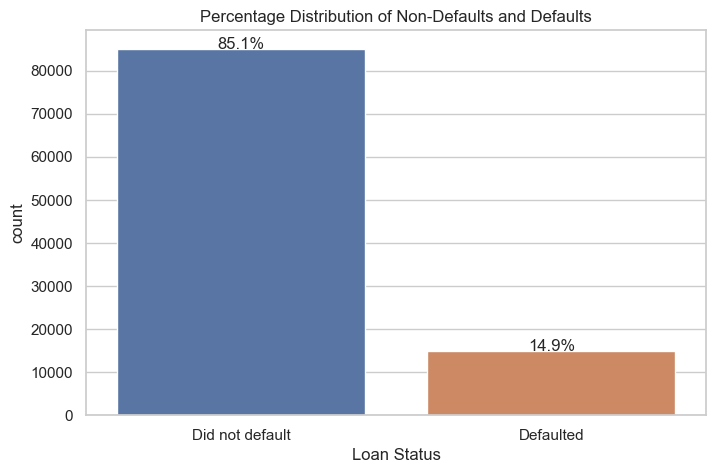

In [52]:
#Plotting the Percentage of Lenders who did not default on the loan (Did not default). 
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(data))
ax = sns.countplot(x="Loan Status", data=data)
for p in ax.patches: 
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.title('Percentage Distribution of Non-Defaults and Defaults', fontsize=12)
plt.show()

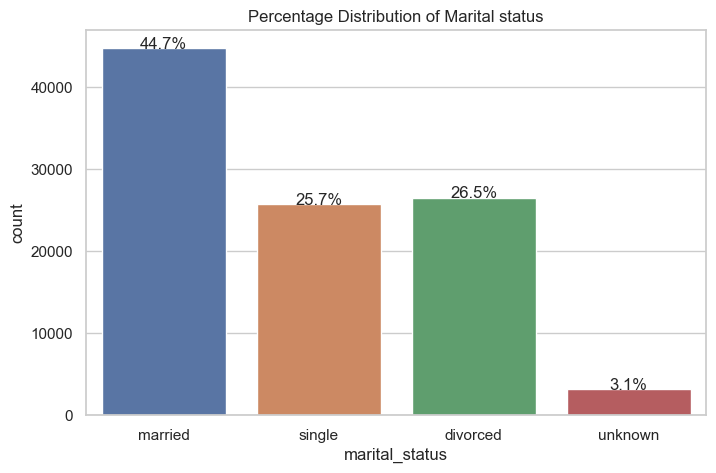

In [53]:
#Distribution of marital_status
data['marital_status'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(data))
ax = sns.countplot(x="marital_status", data=data)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.title('Percentage Distribution of Marital status', fontsize=12)
plt.show()

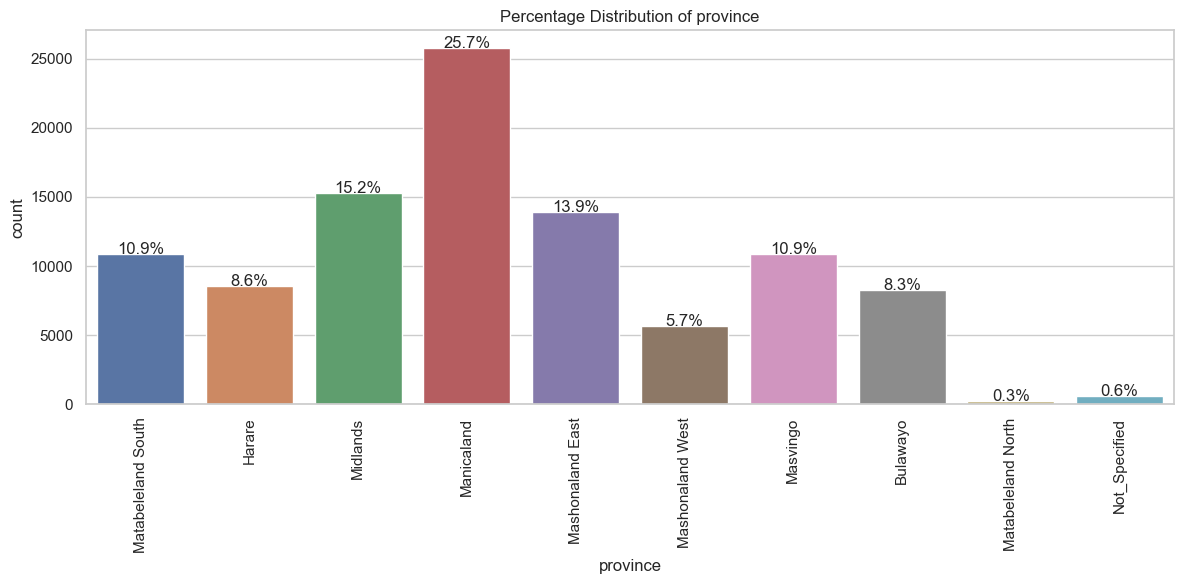

In [54]:
# Distribution of province
data['province'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(12,6))  # Increase the figure size to accommodate the rotated labels
total = float(len(data))
ax = sns.countplot(x="province", data=data)

# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90)

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')

plt.title('Percentage Distribution of province', fontsize=12)
plt.tight_layout()  # Adjust the layout to prevent overlapping labels
plt.show()

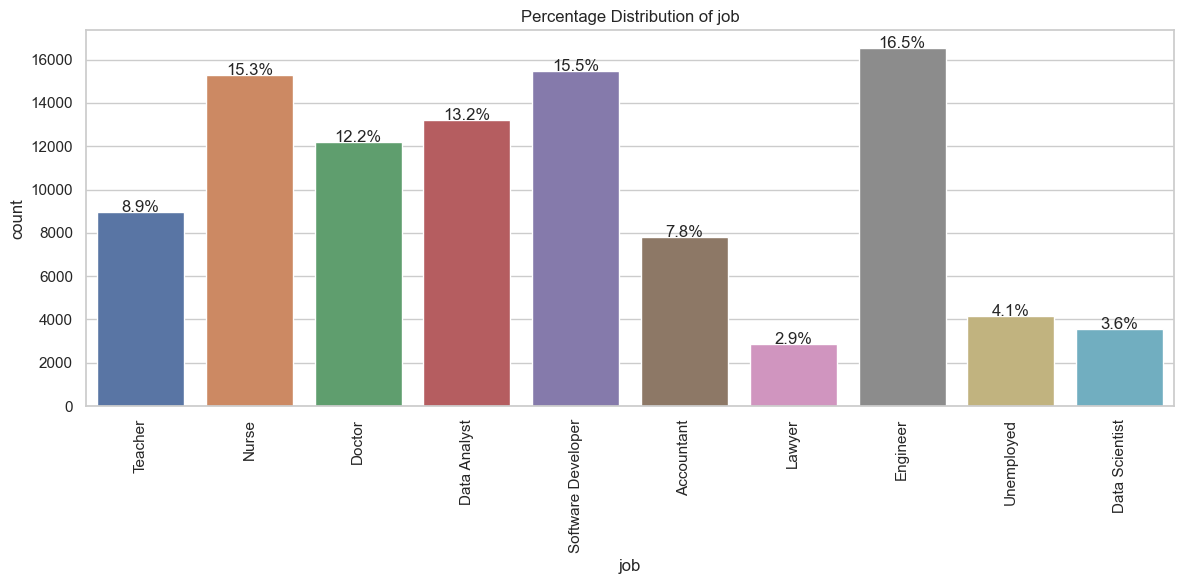

In [55]:
# Distribution of job
data['job'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(12,6))  # Increase the figure size to accommodate the rotated labels
total = float(len(data))
ax = sns.countplot(x="job", data=data)

# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90)

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')

plt.title('Percentage Distribution of job', fontsize=12)
plt.tight_layout()  # Adjust the layout to prevent overlapping labels
plt.show()

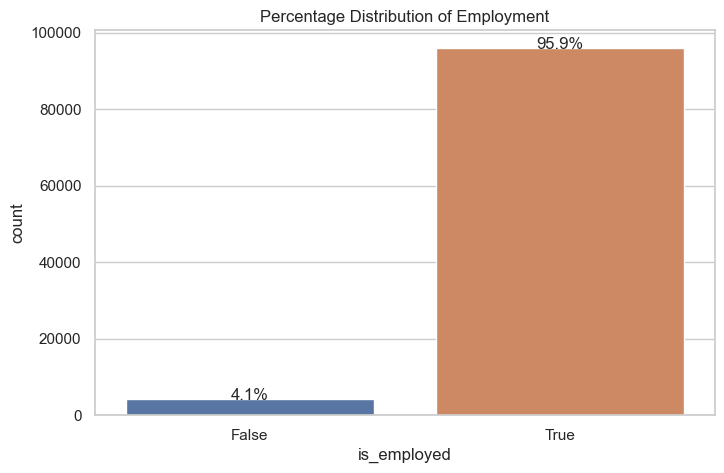

In [56]:
#Distribution of is_employed
data['is_employed'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(data))
ax = sns.countplot(x="is_employed", data=data)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.title('Percentage Distribution of Employment', fontsize=12)
plt.show()

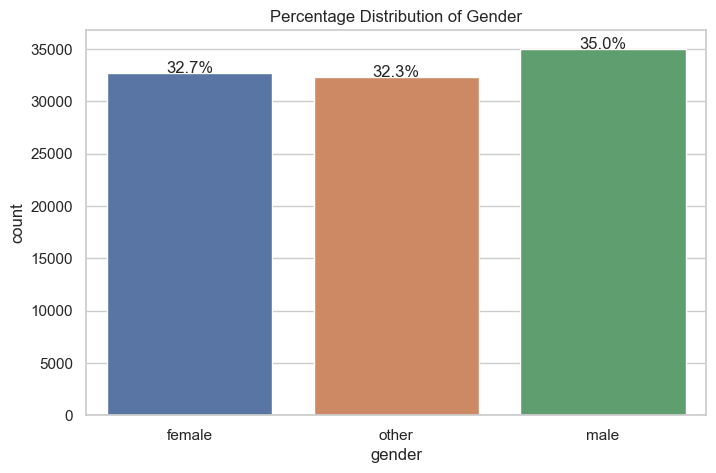

In [57]:
#Distribution of gender
data['gender'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(data))
ax = sns.countplot(x="gender", data=data)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.title('Percentage Distribution of Gender', fontsize=12)
plt.show()

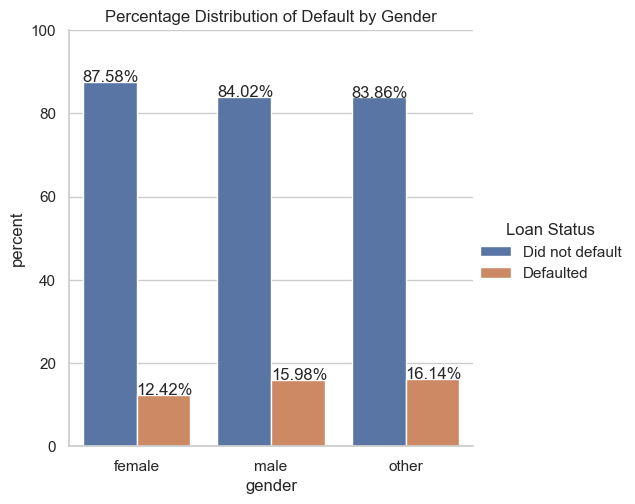

In [58]:
# Percentage distribution of ‘Gender’ on Default
x,y = 'gender', 'Loan Status'
data1 = data.groupby(x)[y].value_counts(normalize=True)
data1 = data1.mul(100)
data1 = data1.rename('percent').reset_index()
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=data1)
g.ax.set_ylim(0,100)
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
plt.title('Percentage Distribution of Default by Gender', fontsize=12)
plt.show()

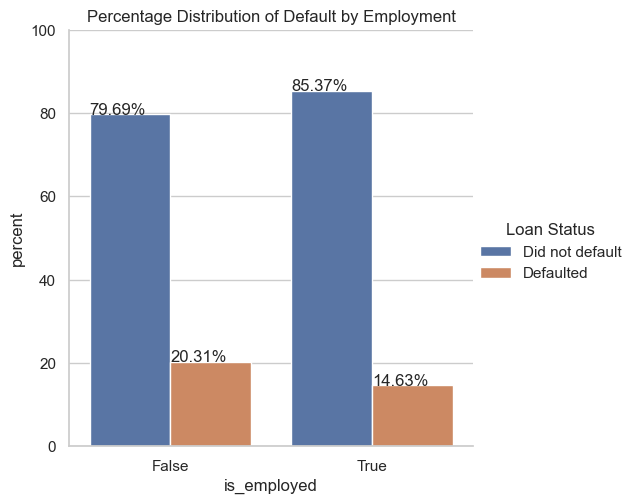

In [59]:
# Percentage distribution of ‘employment’ on Default
x,y = 'is_employed', 'Loan Status'
data1 = data.groupby(x)[y].value_counts(normalize=True)
data1 = data1.mul(100)
data1 = data1.rename('percent').reset_index()
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=data1)
g.ax.set_ylim(0,100)
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
plt.title('Percentage Distribution of Default by Employment', fontsize=12)
plt.show()

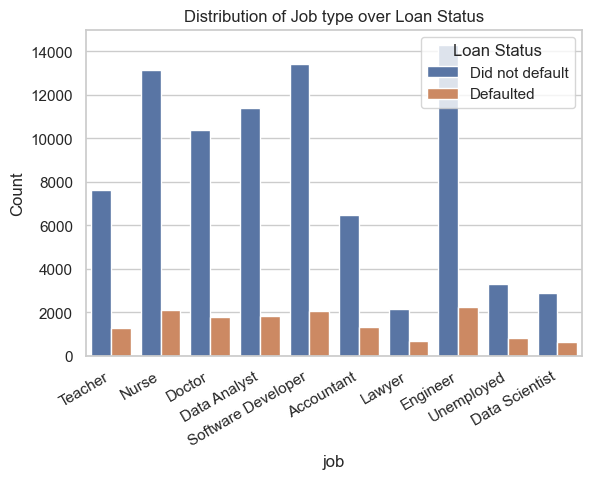

In [60]:
# Percentage distribution of 'Job type' on Default
ax4 = sns.countplot(x='job', hue='Loan Status', data=data)
ax4.set_title('Distribution of Job type over Loan Status')
ax4.set_xlabel('job')
ax4.set_ylabel('Count')

# Automatically format the x-axis labels
plt.xticks(rotation=90)
plt.gcf().autofmt_xdate()

plt.show()

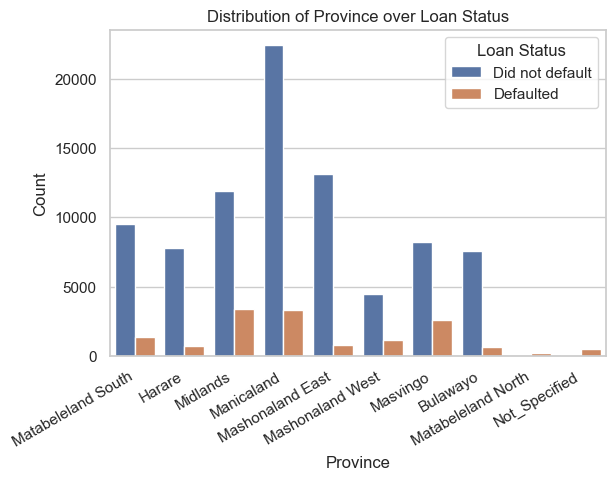

In [61]:
# Percentage distribution of 'province' on Default
ax4 = sns.countplot(x='province', hue='Loan Status', data=data)
ax4.set_title('Distribution of Province over Loan Status')
ax4.set_xlabel('Province')
ax4.set_ylabel('Count')

# Automatically format the x-axis labels
plt.xticks(rotation=90)
plt.gcf().autofmt_xdate()

plt.show()

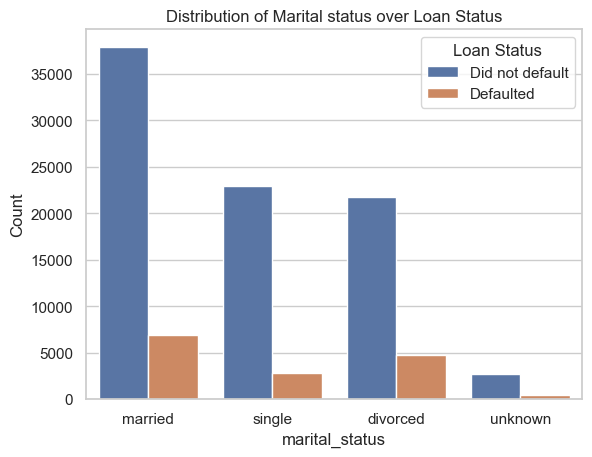

In [62]:
# Percentage distribution of 'marital_status' on Default
ax4 = sns.countplot(x='marital_status', hue='Loan Status', data=data)
ax4.set_title('Distribution of Marital status over Loan Status')
ax4.set_xlabel('marital_status')
ax4.set_ylabel('Count')
plt.show()

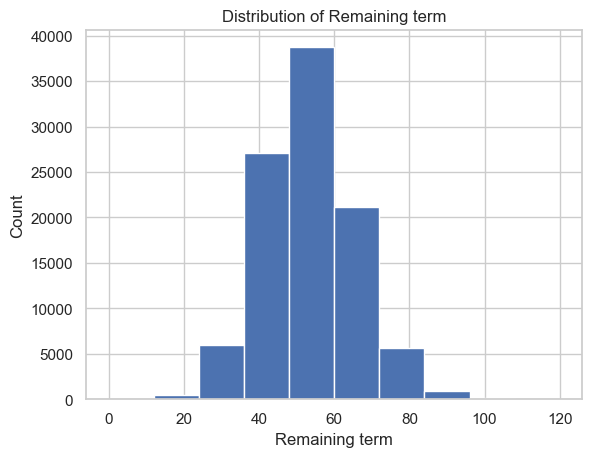

In [63]:
#import matplotlib.pyplot as plt

plt.hist(data['remaining term'])
plt.title('Distribution of Remaining term', fontsize=12)
plt.xlabel('Remaining term', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

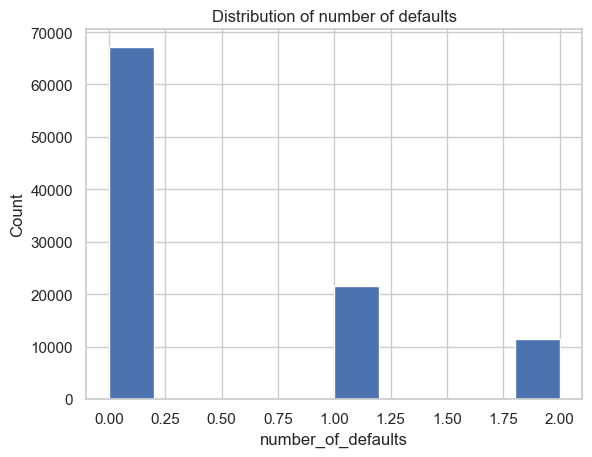

In [64]:
plt.hist(data['number_of_defaults'])
plt.title('Distribution of number of defaults', fontsize=12)
plt.xlabel('number_of_defaults', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

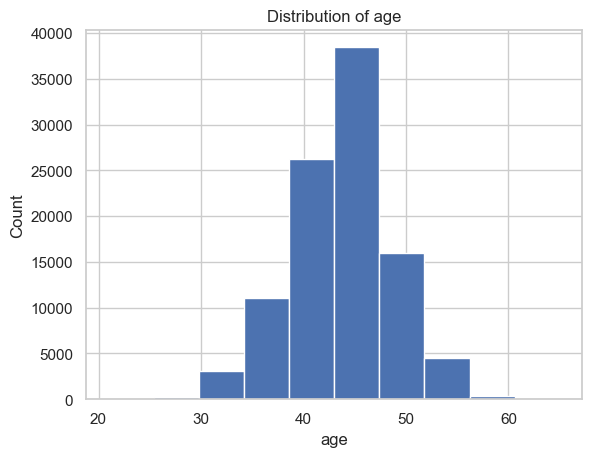

In [65]:
plt.hist(data['age'])
plt.title('Distribution of age', fontsize=12)
plt.xlabel('age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

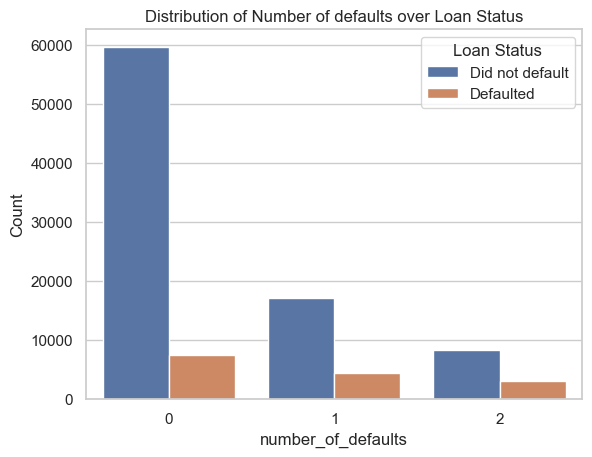

In [66]:
ax4 = sns.countplot(x='number_of_defaults', hue='Loan Status', data=data)
ax4.set_title('Distribution of Number of defaults over Loan Status')
ax4.set_xlabel('number_of_defaults')
ax4.set_ylabel('Count')
plt.show()

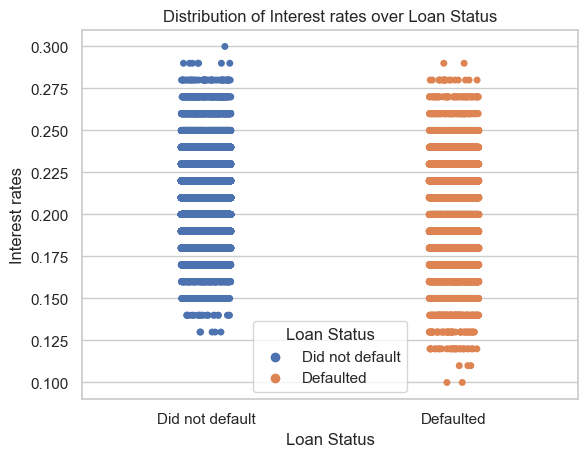

In [67]:
sns.stripplot(x=data['Loan Status'], y=data['interest_rate'], hue=data['Loan Status'])
plt.title('Distribution of Interest rates over Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Interest rates')
plt.show()

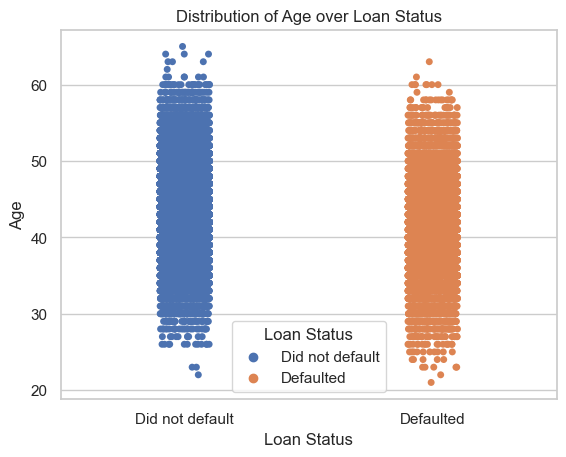

In [68]:
sns.stripplot(x=data['Loan Status'], y=data['age'], hue=data['Loan Status'])
plt.title('Distribution of Age over Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Age')
plt.show()

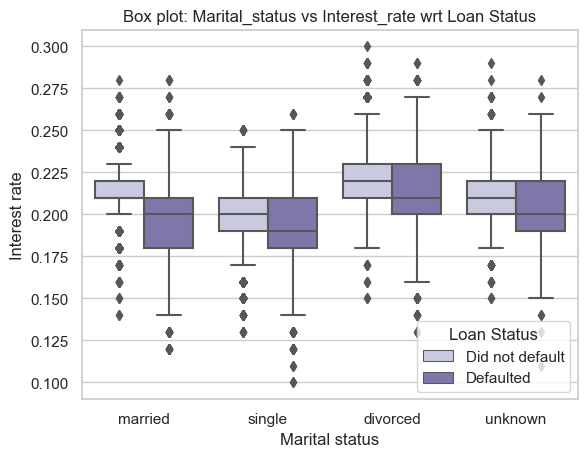

In [69]:
# Marital status vs Interest rate w.r.t Loan Status
sns.boxplot(x = data['marital_status'], y = data['interest_rate'], hue = data['Loan Status'], palette = 'Purples')
plt.title('Box plot: Marital_status vs Interest_rate wrt Loan Status')
plt.xlabel('Marital status')
plt.ylabel('Interest rate')
plt.show()

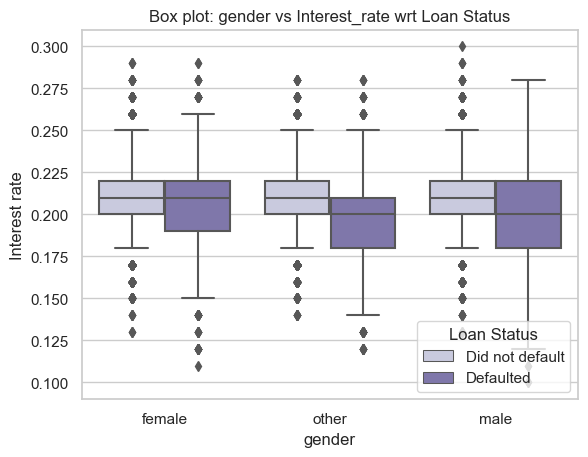

In [70]:
# Gender vs Interest rate w.r.t Loan Status
sns.boxplot(x = data['gender'], y = data['interest_rate'], hue = data['Loan Status'], palette = 'Purples')
plt.title('Box plot: gender vs Interest_rate wrt Loan Status')
plt.xlabel('gender')
plt.ylabel('Interest rate')
plt.show()

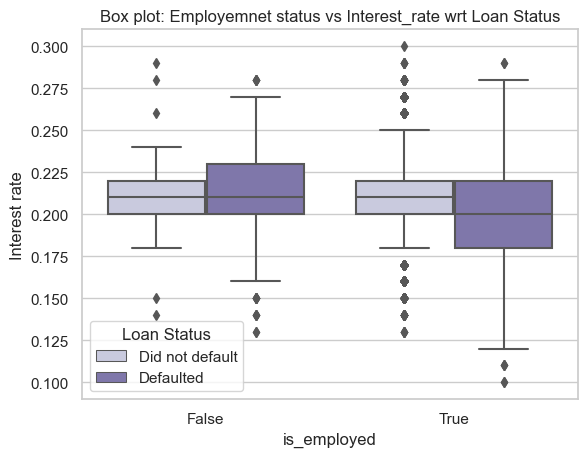

In [71]:
# Employemnet status vs Interest rate w.r.t Loan Status
sns.boxplot(x = data['is_employed'], y = data['interest_rate'], hue = data['Loan Status'], palette = 'Purples')
plt.title('Box plot: Employemnet status vs Interest_rate wrt Loan Status')
plt.xlabel('is_employed')
plt.ylabel('Interest rate')
plt.show()

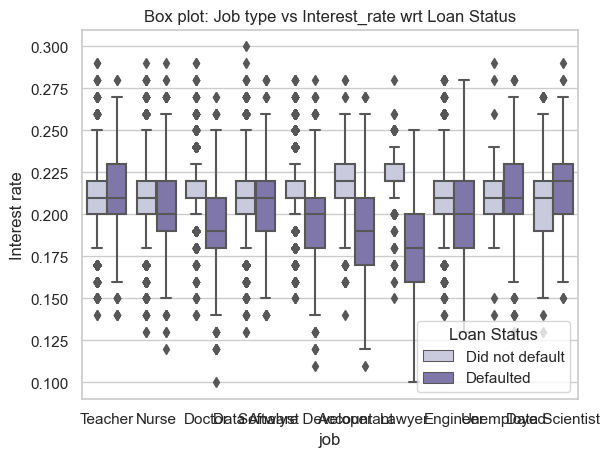

In [72]:
# Job Type vs Interest rate w.r.t Loan Status
sns.boxplot(x = data['job'], y = data['interest_rate'], hue = data['Loan Status'], palette = 'Purples')
plt.title('Box plot: Job type vs Interest_rate wrt Loan Status')
plt.xlabel('job')
plt.ylabel('Interest rate')
plt.show()

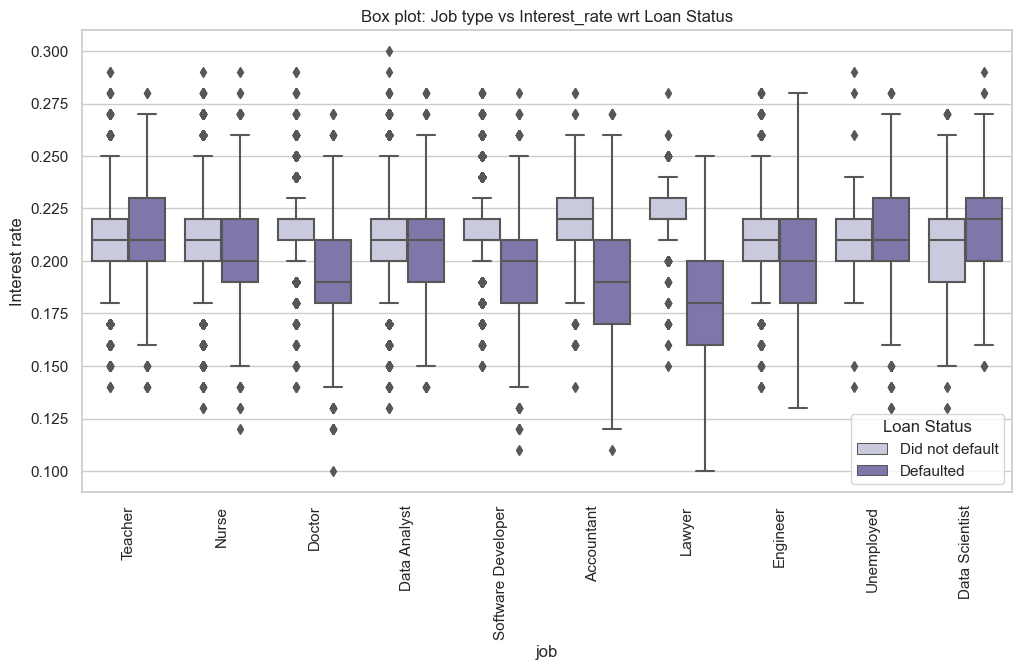

In [73]:
# Job Type vs Interest rate w.r.t Loan Status
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['job'], y=data['interest_rate'], hue=data['Loan Status'], palette='Purples')
plt.title('Box plot: Job type vs Interest_rate wrt Loan Status')
plt.xlabel('job')
plt.ylabel('Interest rate')

# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90)

plt.show()

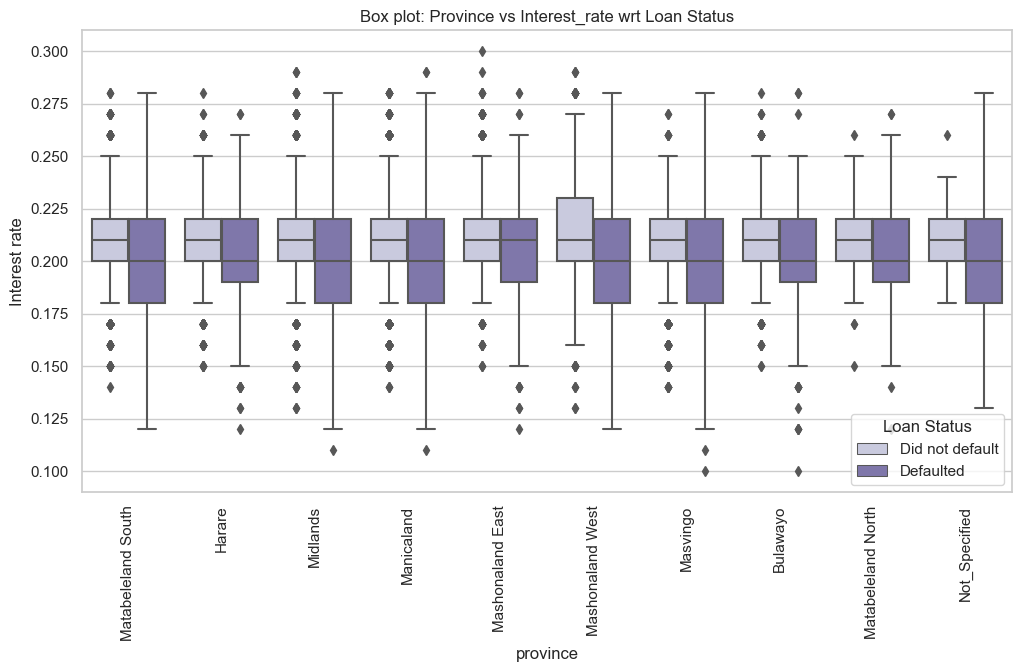

In [74]:
# Province vs Interest rate w.r.t Loan Status
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['province'], y=data['interest_rate'], hue=data['Loan Status'], palette='Purples')
plt.title('Box plot: Province vs Interest_rate wrt Loan Status')
plt.xlabel('province')
plt.ylabel('Interest rate')

# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90)

plt.show()

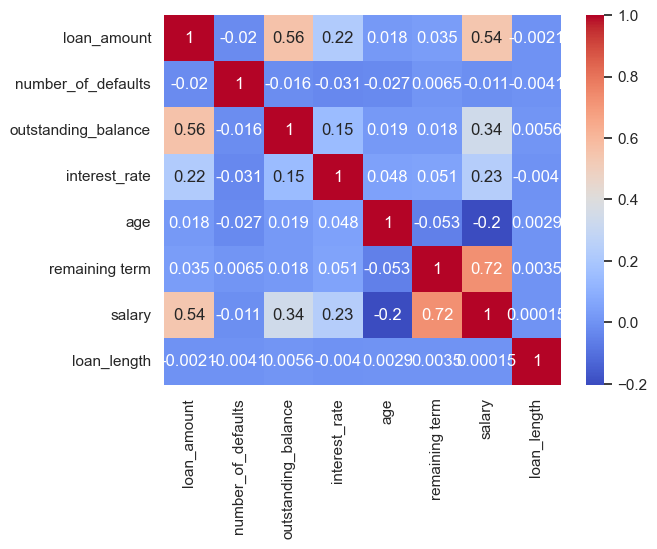

<Figure size 2e+06x1e+06 with 0 Axes>

In [75]:
#Checking for multicolinearity
# Calculate the correlation matrix

# Select the variables to include in the correlation calculation and visualization
included_variables = ['loan_amount', 'number_of_defaults', 'outstanding_balance', 'interest_rate', 'age', 'remaining term', 'salary', 'loan_length']  # Specify the variables you want to include

# Subset the data to include only the selected variables
subset_data = data[included_variables]

# Calculate the correlation matrix
corr_matrix = subset_data.corr()

# Create a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Adjust the figure size
plt.figure(figsize=(20000, 10000))  # Increase the width and height values as needed

# Show the plot
plt.show()

In [76]:
#Encoding binary data
from sklearn.preprocessing import LabelEncoder

# Instantiate the LabelEncoder
le = LabelEncoder()


In [78]:
#  original DataFrame is named 'data'
encoded_y = data.copy()

# Fit and transform the 'Loan Status' column
encoded_y['Loan_Status_encoded'] = le.fit_transform(encoded_y['Loan Status'])

# Swap the labels to have 'True' mapped to 0 and 'False' mapped to 1
encoded_y['Loan_Status_encoded'] = 1 - encoded_y['Loan_Status_encoded']

# Print the encoded DataFrame
print(encoded_y)


                                    loan_id  gender  is_employed  \
0      8d05de78-ff32-46b1-aeb5-b3190f9c158a  female         True   
1      368bf756-fcf2-4822-9612-f445d90b485b   other         True   
2      6e3be39e-49b5-45b5-aab6-c6556de53c6f   other         True   
3      191c62f8-2211-49fe-ba91-43556b307871  female         True   
4      477cd8a1-3b01-4623-9318-8cd6122a8346    male         True   
...                                     ...     ...          ...   
99995  41000f4b-3821-4dea-90e1-9ecf591ed1c0    male        False   
99996  507c2a45-02fa-4aa0-854a-8947a865a7ea   other         True   
99997  4f10e845-8f75-4cd5-9f3a-3dad3e04a483  female         True   
99998  eded01ca-79d2-4e86-a1e3-2ea1354edca7    male         True   
99999  a37561ec-0901-4350-8a13-634f80ece55d   other         True   

                job  loan_amount  number_of_defaults  outstanding_balance  \
0           Teacher        39000                   0          48653.01147   
1           Teacher        27

In [79]:

print(pd.unique(encoded_y['Loan_Status_encoded']))


[0 1]


In [80]:

encoded_y.head(10)

,loan_id,gender,is_employed,job,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,remaining term,salary,marital_status,Loan Status,loan_length,province,Loan_Status_encoded
0,8d05de78-ff32-46b1-aeb5-b3190f9c158a,female,True,Teacher,39000,0,48653.01147,0.22,37,47,3230.038869,married,Did not default,20,Matabeleland South,0
1,368bf756-fcf2-4822-9612-f445d90b485b,other,True,Teacher,27000,2,28752.06224,0.20,43,62,3194.139103,single,Did not default,48,Harare,0
2,6e3be39e-49b5-45b5-aab6-c6556de53c6f,other,True,Nurse,35000,1,44797.55413,0.22,43,57,3330.826656,married,Did not default,9,Midlands,0
3,191c62f8-2211-49fe-ba91-43556b307871,female,True,Doctor,24000,0,35681.49641,0.23,47,42,2246.797020,divorced,Did not default,24,Manicaland,0
4,477cd8a1-3b01-4623-9318-8cd6122a8346,male,True,Nurse,19000,0,34156.05588,0.20,42,45,2310.858441,married,Did not default,16,Manicaland,0
5,3595fbe4-397c-42b1-aeb2-f85a6cdf4ee3,other,True,Data Analyst,29000,0,37778.07518,0.21,46,44,2633.653709,single,Did not default,43,Manicaland,0
6,a6255398-b8c6-494c-b7ff-3d7fee6703d5,male,True,Teacher,24000,0,28675.96845,0.22,47,52,2554.371003,single,Did not default,7,Harare,0
7,b259ce87-a771-46ee-9785-b0a9f5dab2d6,female,True,Data Analyst,38000,1,38406.93371,0.22,39,46,2847.991485,married,Did not default,39,Mashonaland East,0
8,5f7444d0-76c9-4902-8a97-a1d134101100,other,True,Nurse,23000,0,28015.54380,0.22,46,47,2521.387875,married,Did not default,50,Mashonaland West,0
9,12fb64f7-8101-4868-a2fe-83178bbaebce,male,True,Nurse,50000,1,61800.46764,0.24,37,43,2799.437570,divorced,Did not default,42,Mashonaland East,0


In [81]:
#dropping an un-useful column from the dataset

encoded_y = encoded_y.drop(['Loan Status'], axis=1)

encoded_y.head(5)

,loan_id,gender,is_employed,job,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,remaining term,salary,marital_status,loan_length,province,Loan_Status_encoded
0,8d05de78-ff32-46b1-aeb5-b3190f9c158a,female,True,Teacher,39000,0,48653.01147,0.22,37,47,3230.038869,married,20,Matabeleland South,0
1,368bf756-fcf2-4822-9612-f445d90b485b,other,True,Teacher,27000,2,28752.06224,0.20,43,62,3194.139103,single,48,Harare,0
2,6e3be39e-49b5-45b5-aab6-c6556de53c6f,other,True,Nurse,35000,1,44797.55413,0.22,43,57,3330.826656,married,9,Midlands,0
3,191c62f8-2211-49fe-ba91-43556b307871,female,True,Doctor,24000,0,35681.49641,0.23,47,42,2246.797020,divorced,24,Manicaland,0
4,477cd8a1-3b01-4623-9318-8cd6122a8346,male,True,Nurse,19000,0,34156.05588,0.20,42,45,2310.858441,married,16,Manicaland,0


In [82]:

# Assigning dependent and independent variables

x = encoded_y.iloc[:, 1:-1]
y = encoded_y['Loan_Status_encoded']


In [83]:
# checking the shapes
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)# Vizualizing relationships between X and Y


Shape of x: (100000, 13)
Shape of y: (100000,)


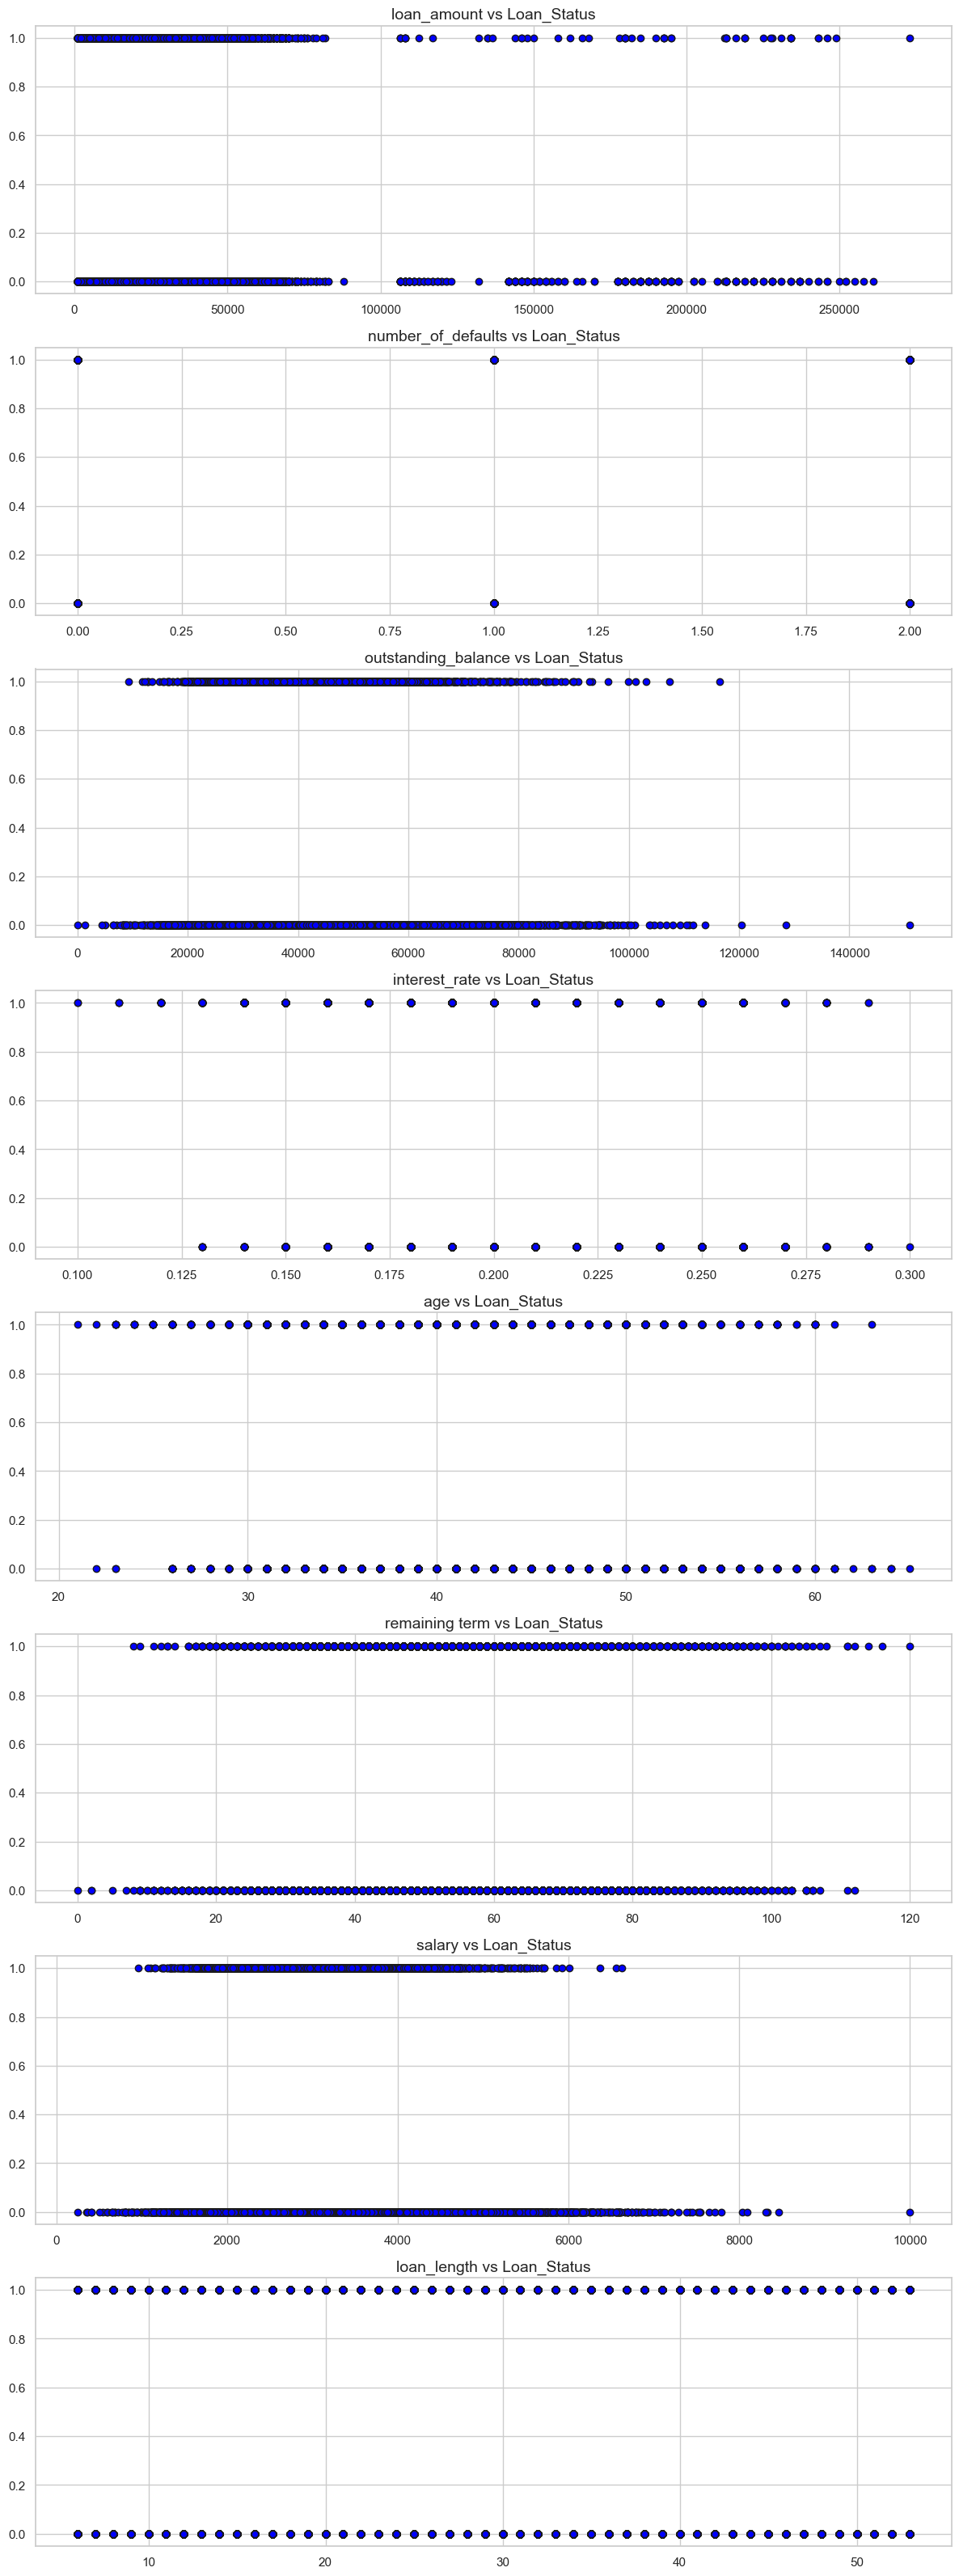

In [84]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# Taking X as the predictor variable  and Y as the target variable

# List of columns you want to include in the scatter plot
columns_to_plot = ['loan_amount', 'number_of_defaults', 'outstanding_balance', 'interest_rate', 'age', 'remaining term', 'salary', 'loan_length']  # Specify the variables you want to include

fig, axs = plt.subplots(len(columns_to_plot), 1, figsize=(12, 4*len(columns_to_plot)))
fig.subplots_adjust(hspace=0.5, wspace=0.2)
axs = axs.ravel()

for index, column in enumerate(columns_to_plot):
    axs[index].set_title("{} vs Loan_Status".format(column), fontsize=14)
    axs[index].scatter(x=x[column], y=y, color='blue', edgecolor='k')

fig.tight_layout(pad=1)
plt.show()

## c. Feature Selection


In [85]:
#Feature selection on categorical variables

### Chi-Square test 

In [86]:
data.head()

,loan_id,gender,is_employed,job,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,remaining term,salary,marital_status,Loan Status,loan_length,province
0,8d05de78-ff32-46b1-aeb5-b3190f9c158a,female,True,Teacher,39000,0,48653.01147,0.22,37,47,3230.038869,married,Did not default,20,Matabeleland South
1,368bf756-fcf2-4822-9612-f445d90b485b,other,True,Teacher,27000,2,28752.06224,0.20,43,62,3194.139103,single,Did not default,48,Harare
2,6e3be39e-49b5-45b5-aab6-c6556de53c6f,other,True,Nurse,35000,1,44797.55413,0.22,43,57,3330.826656,married,Did not default,9,Midlands
3,191c62f8-2211-49fe-ba91-43556b307871,female,True,Doctor,24000,0,35681.49641,0.23,47,42,2246.797020,divorced,Did not default,24,Manicaland
4,477cd8a1-3b01-4623-9318-8cd6122a8346,male,True,Nurse,19000,0,34156.05588,0.20,42,45,2310.858441,married,Did not default,16,Manicaland


In [87]:
data_cat=data[['gender', 'is_employed', 'job', 'marital_status','province','Loan Status']]

In [88]:
data_cat.head()

,gender,is_employed,job,marital_status,province,Loan Status
0,female,True,Teacher,married,Matabeleland South,Did not default
1,other,True,Teacher,single,Harare,Did not default
2,other,True,Nurse,married,Midlands,Did not default
3,female,True,Doctor,divorced,Manicaland,Did not default
4,male,True,Nurse,married,Manicaland,Did not default


In [90]:
import warnings
warnings.filterwarnings("ignore")
#Label encoding
from sklearn.preprocessing import LabelEncoder

for col in data_cat.columns:
    le = LabelEncoder()
    data_cat[col] = le.fit_transform(data_cat[col])

In [91]:
data_cat.head()

,gender,is_employed,job,marital_status,province,Loan Status
0,0,1,8,1,7,1
1,2,1,8,2,1,1
2,2,1,6,1,8,1
3,0,1,3,0,2,1
4,1,1,6,1,2,1


In [92]:
from sklearn.feature_selection import chi2
X_ = data_cat.drop(columns =['Loan Status'], axis = 1)
y_ = data_cat['Loan Status']

In [93]:
chi_scores = chi2(X_,y_)

In [94]:
#disply the scores
chi_scores

(array([1.16178337e+02, 4.17793089e+00, 1.49805426e-01, 2.42606750e+02,
        3.60169608e+03]),
 array([4.34421381e-27, 4.09536707e-02, 6.98721369e-01, 1.06250329e-54,
        0.00000000e+00]))

In [95]:
# The higher the Chi square scores the higher the importance of the predictor to the target variable


<Axes: >

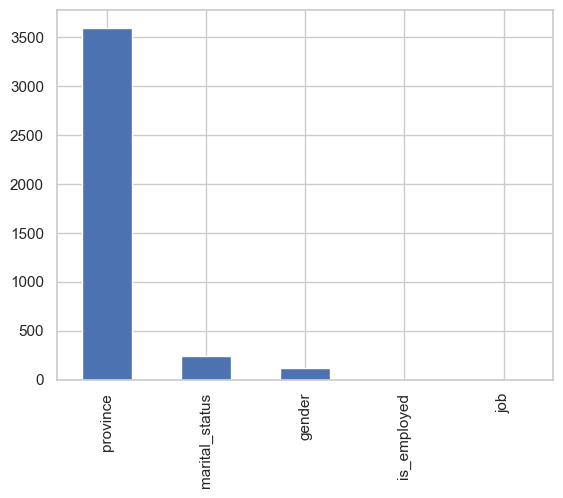

In [96]:
chi_values =pd.Series(chi_scores[0], index = X_.columns)
chi_values.sort_values(ascending = False, inplace =True)
chi_values.plot.bar()

### Using p - values 

<Axes: >

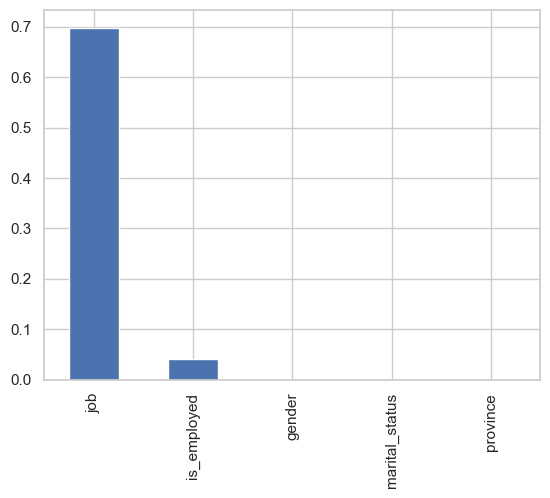

In [97]:
# The higher the p-value the lower the importance of the predictor to the target variable
# if the p value> 0.05 , the lower 
p_values =pd.Series(chi_scores[1], index = X_.columns)
p_values.sort_values(ascending = False, inplace =True)
p_values.plot.bar()

### Feature Selection for continuous variables 

### Information Gain/Mutual Information  

In [98]:
from sklearn.feature_selection import mutual_info_classif

In [99]:
data.head()

,loan_id,gender,is_employed,job,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,remaining term,salary,marital_status,Loan Status,loan_length,province
0,8d05de78-ff32-46b1-aeb5-b3190f9c158a,female,True,Teacher,39000,0,48653.01147,0.22,37,47,3230.038869,married,Did not default,20,Matabeleland South
1,368bf756-fcf2-4822-9612-f445d90b485b,other,True,Teacher,27000,2,28752.06224,0.20,43,62,3194.139103,single,Did not default,48,Harare
2,6e3be39e-49b5-45b5-aab6-c6556de53c6f,other,True,Nurse,35000,1,44797.55413,0.22,43,57,3330.826656,married,Did not default,9,Midlands
3,191c62f8-2211-49fe-ba91-43556b307871,female,True,Doctor,24000,0,35681.49641,0.23,47,42,2246.797020,divorced,Did not default,24,Manicaland
4,477cd8a1-3b01-4623-9318-8cd6122a8346,male,True,Nurse,19000,0,34156.05588,0.20,42,45,2310.858441,married,Did not default,16,Manicaland


In [100]:
data_IG = data[['loan_amount','number_of_defaults','outstanding_balance','interest_rate','age','remaining term','salary','loan_length','Loan Status']]

In [101]:
X_ = data_IG.drop(columns = ['Loan Status'], axis = 1)
y_ = data_IG['Loan Status']

In [102]:
mutual_info = mutual_info_classif(X_, y_)

In [103]:
feature_importances = mutual_info / np.max(mutual_info)

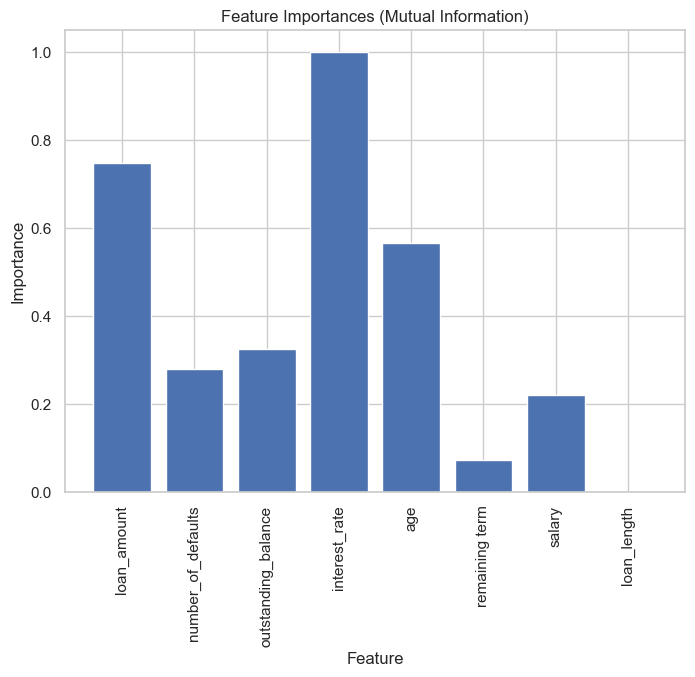

In [104]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(range(len(feature_importances)), feature_importances)
plt.xticks(range(len(feature_importances)), X_.columns, rotation=90)
plt.title('Feature Importances (Mutual Information)')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()